# Reading acclerations

In [1]:
%pylab inline
import pygadgetreader

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [27]:
filename='./gadget3_MWLMC5_100M_b1_dmhalopart_elgato_1e6_001'
f = open(filename,'rb')    
blocksize = np.fromfile(f,dtype=np.int32,count=1)[0]
print(blocksize)
bytesleft=96
npart=np.fromfile(f, dtype=np.int32, count=6)
massarr = np.fromfile(f,dtype=np.float64,count=6)
time = (np.fromfile(f,dtype=np.float64,count=1))[0]
redshift = (np.fromfile(f,dtype=np.float64,count=1))[0]
sfr=(np.fromfile(f,dtype=np.int32,count=1))[0]
feedback = (np.fromfile(f,dtype=np.int32,count=1))[0]
nall = np.fromfile(f,dtype=np.int32,count=6)
cooling = (np.fromfile(f,dtype=np.int32,count=1))[0]
filenum = (np.fromfile(f,dtype=np.int32,count=1))[0]
boxsize = (np.fromfile(f,dtype=np.float64,count=1))[0]
omega_m = (np.fromfile(f,dtype=np.float64,count=1))[0]
omega_l = (np.fromfile(f,dtype=np.float64,count=1))[0]
hubble = (np.fromfile(f,dtype=np.float64,count=1))[0]
headerend = np.fromfile(f, dtype=np.int8, count=96)
blocksize = np.fromfile(f,dtype=np.int32,count=1)[0]
#print headerend
#print blocksize

blocksize = np.fromfile(f,dtype=np.int32,count=1)[0]
#print blocksize, 'blocksize pp'
#ntot=np.int64(np.sum(npart))
dt = np.dtype((np.float32,3)) # type of entry for POS, VEL, ACCEL, etc.
pp=np.fromfile(f, dtype=np.dtype(dt), count=np.sum(npart))
#print pp, np.size(pp)
blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]
print(blocksize, 'blocksize pp')


blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]
#print blocksize, 'blocksize vv'
vv=np.fromfile(f, dtype=dt, count=np.sum(npart))
blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]
#print blocksize, 'blocksize vv'


blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]
#print blocksize, 'blocksize ids'
ids=np.fromfile(f, dtype=np.uint32, count=np.sum(npart))
blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]
print(blocksize, 'blocksize ids')

#print ids, 'ids'
blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]
mass=np.fromfile(f, dtype=np.float32, count=np.sum(npart))
blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]

print(blocksize, 'blocksize mass')


blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]
#print blocksize, 'blocksize vv'
pot=np.fromfile(f, dtype=np.float32, count=np.sum(npart))
blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]


blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]
#print blocksize, 'blocksize vv'
acc=np.fromfile(f, dtype=dt, count=np.sum(npart))
#blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]


#blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]
#print blocksize, 'blocksize vv'
#o=np.fromfile(f, dtype=np.float32, count=np.sum(npart))
#blocksize = np.fromfile(f,dtype=np.uint32,count=1)[0]

256
12000000 blocksize pp
4000000 blocksize ids
4000000 blocksize mass


In [28]:
pot

array([-25161240. , -25161240. , -21580976. , ...,  -8259479.5,
        -7770014. ,  -7770014. ], dtype=float32)

In [29]:
pot[-1]

-7770014.0

In [30]:
vv

array([[-1163.3561 , -1137.1669 , -1528.9722 ],
       [-1163.3561 , -1137.1669 , -1528.9722 ],
       [-1322.3755 , -1118.7097 , -1153.1669 ],
       ...,
       [  360.72415,  1064.2919 ,   619.02637],
       [  285.70706,  1039.075  ,   603.73895],
       [  285.70706,  1039.075  ,   603.73895]], dtype=float32)

In [31]:
acc

array([[-304.40768 , -294.51627 , -415.72165 ],
       [-304.40768 , -294.51627 , -415.72165 ],
       [-345.87128 , -288.32812 , -315.19614 ],
       ...,
       [  99.234955,  286.96326 ,  153.0298  ],
       [  77.90101 ,  283.36252 ,  149.66446 ],
       [  77.90101 ,  283.36252 ,  149.66446 ]], dtype=float32)

In [32]:
r_mwlmc = (pp[:,0]**2 + pp[:,1]**2 + pp[:,2]**2)**0.5
r_cut = where(r_mwlmc < 300)


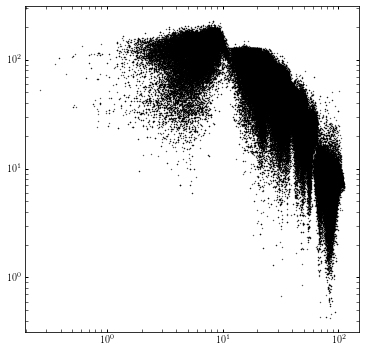

In [33]:
ax = figure(figsize=(6, 6))
scatter(r_mwlmc[r_cut], (acc[r_cut, 0]**2 + acc[r_cut, 1]**2 + acc[r_cut, 2]**2)**0.5, s=0.1, c='k')
xscale('log')
yscale('log')

In [34]:
savetxt('acclerations_mwlmc5_b1_1e6.txt', acc[r_cut])
savetxt('pos_mwlmc5_b1_1e6.txt', pp[r_cut])

In [24]:
pygadgetreader.readsnap('gadget3_MWLMC5_100M_b1_dmhalopart_elgato_001', 'pot', 'dm')

Returning DM    Potential


array([ -603.59674,  -597.44714,  -597.7654 , ..., -2857.7268 ,
       -2771.856  , -3043.5627 ], dtype=float32)

In [26]:
mass

array([1.5772125e-06, 1.5772125e-06, 1.5772125e-06, ..., 1.5772125e-06,
       1.5772125e-06, 1.5772125e-06], dtype=float32)